In [1]:
from wgan import WGAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()  # gp loss won't work with eager
from functools import partial
from NuRadioReco.utilities import fft
from NuRadioReco.utilities import units
from NuRadioReco.framework import base_trace
import sys
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("analyze.py"))))
sys.path.insert(1, '/lustre/fs22/group/radio/dhjelm/')
import data_preprocessing
import analyze


2022-09-27 10:20:59.428625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 10:20:59.631572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-27 10:20:59.631605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-27 10:20:59.689970: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-27 10:21:00.518729: W tensorflow/stream_executor/pla

# Data

In [2]:
data = np.load('/lustre/fs22/group/radio/dhjelm/data_preprocessed.npy')
current_noise = np.load('current_noise.npy')


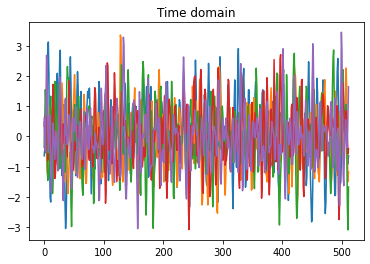

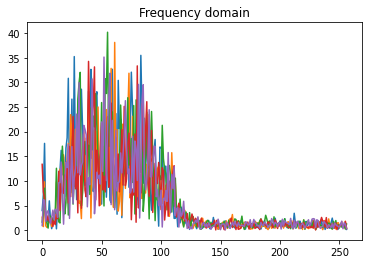

In [3]:
for i in range(5):
    plt.plot(data[i])
plt.title("Time domain")
plt.show()

for i in range(5):
    plt.plot(abs(fft.time2freq(data[i], 3.2*units.GHz)))
plt.title("Frequency domain")
plt.show()


# WGAN

In [4]:
# Create WGAN
wgan = WGAN(time_flag=True, fft_flag=True, wavelet_flag=True, mini_flag=True)

2022-09-27 10:21:03.361583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-27 10:21:03.361622: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-27 10:21:03.361645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wgs3e.zeuthen.desy.de): /proc/driver/nvidia/version does not exist
2022-09-27 10:21:03.362014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 10:21:03.403221: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] M

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 signal_input (InputLayer)   [(None, 512, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 lambda (Lambda)             (None, 65, 65)            0         
                                                                 
 lambda_1 (Lambda)           (None, 65, 65)            0         
                                                                 
 tf_op_layer_ExpandDims (Ten  [(None, 65, 65, 1)]      0         
 sorFlowOpLayer)                                                 
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                            

Epoch:  0
Critic loss: [-0.30135015, -0.78754956, 0.08602603, 0.4001734]
Generator loss: 0.7650858


/afs/ifh.de/group/radio/software/anaconda_p3/envs/jupyter/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


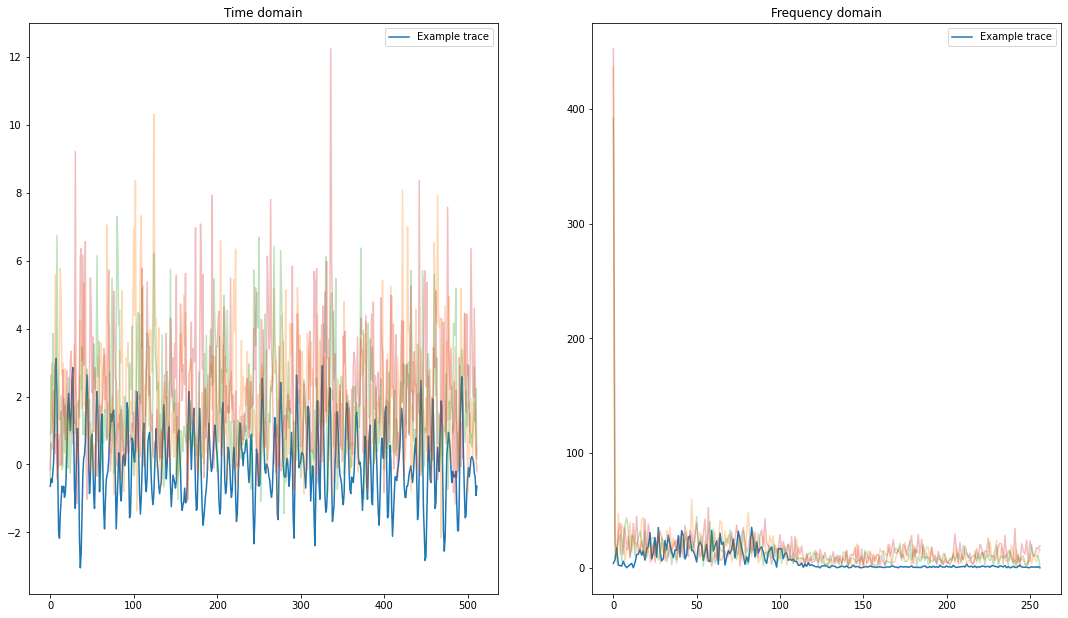

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Critic loss: [-0.5161609, -0.87809485, 0.089789614, 0.27214432]
Generator loss: 0.84334195


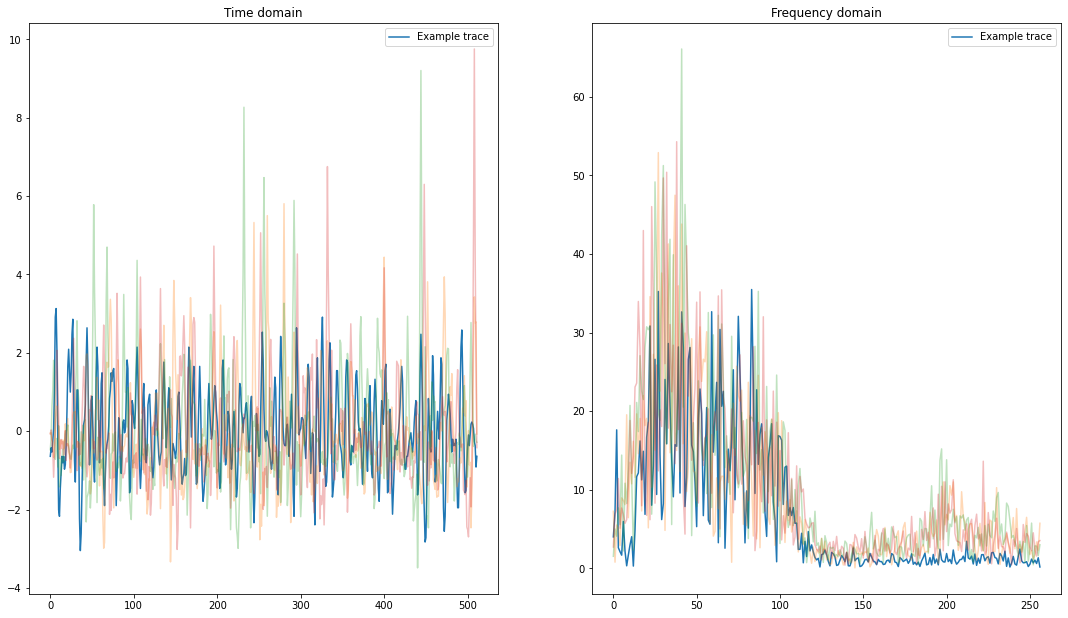

Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Critic loss: [-0.0976785, -0.6628909, 0.4207818, 0.14443062]
Generator loss: 0.5865774


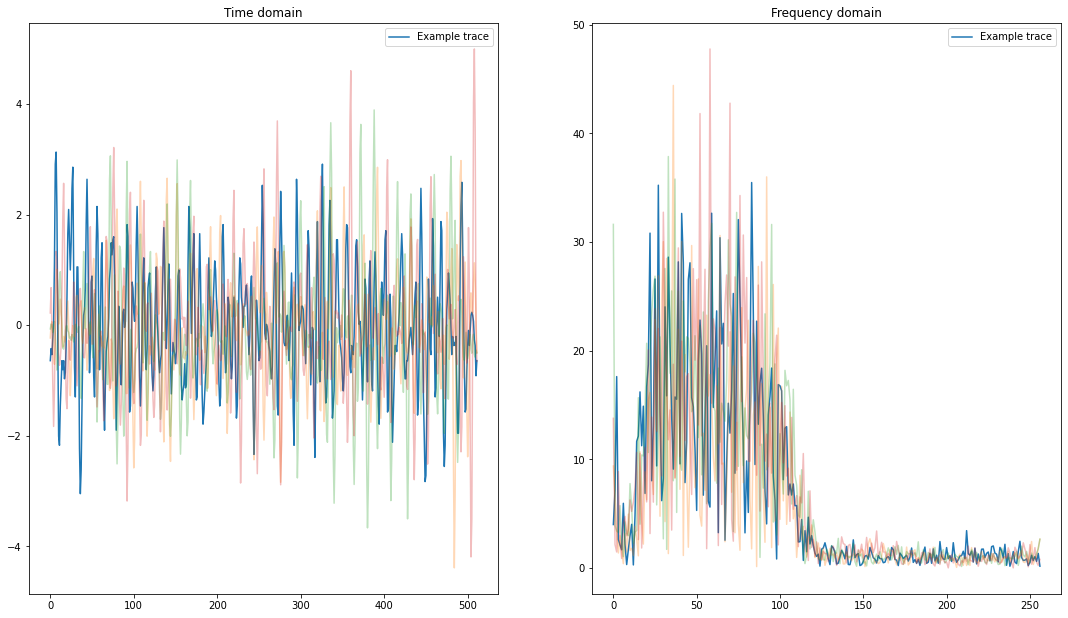

Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Critic loss: [-0.1837112, -0.57541996, 0.2895525, 0.10215625]
Generator loss: 0.6575922


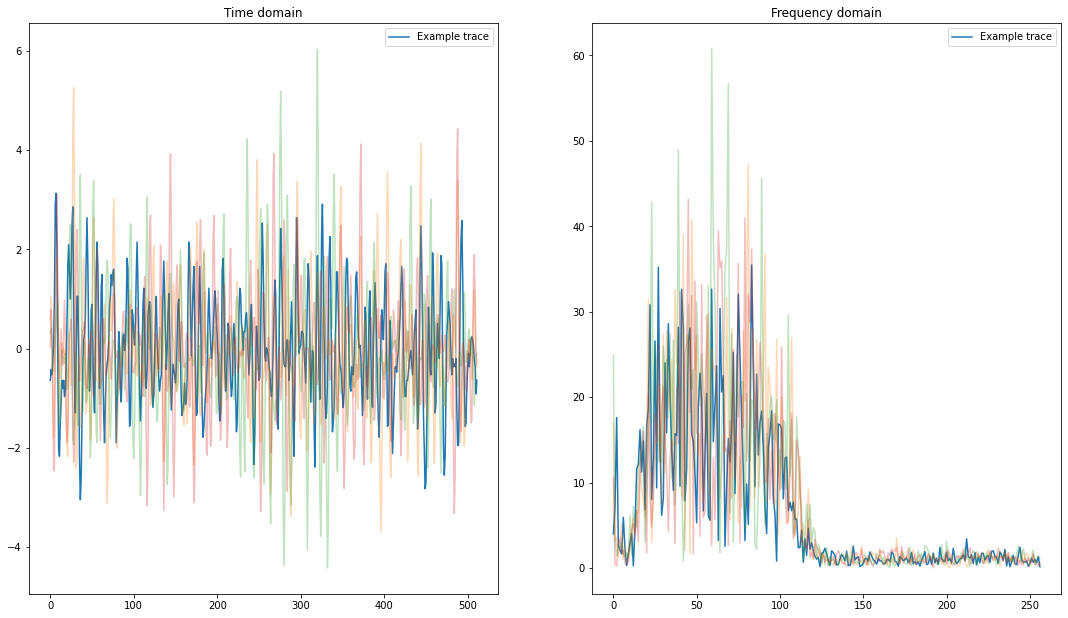

Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Critic loss: [-0.22051106, -0.6454885, 0.34790194, 0.0770755]
Generator loss: 0.65496254


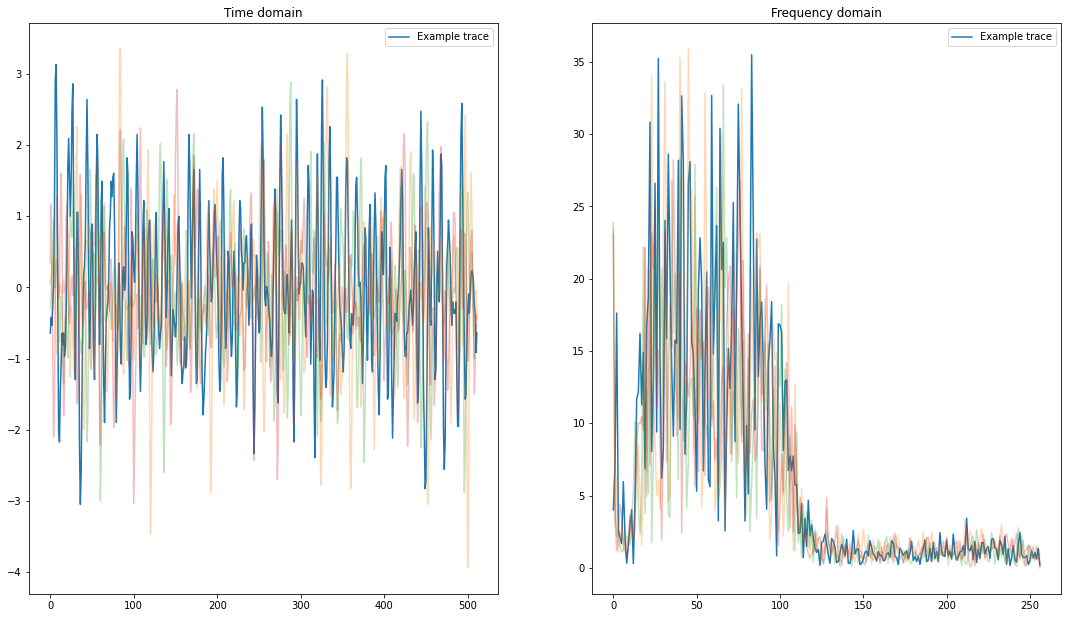

Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Critic loss: [-0.10781483, -0.5669254, 0.36130404, 0.09780653]
Generator loss: 0.57257646


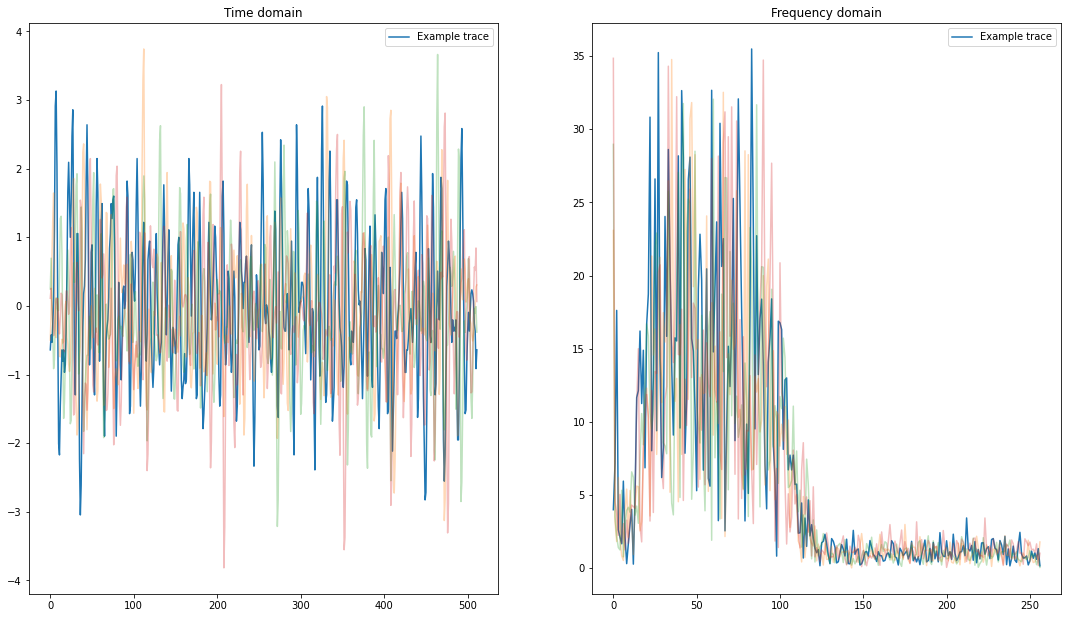

Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Critic loss: [-0.18012187, -0.6400214, 0.38632676, 0.07357275]
Generator loss: 0.6367434


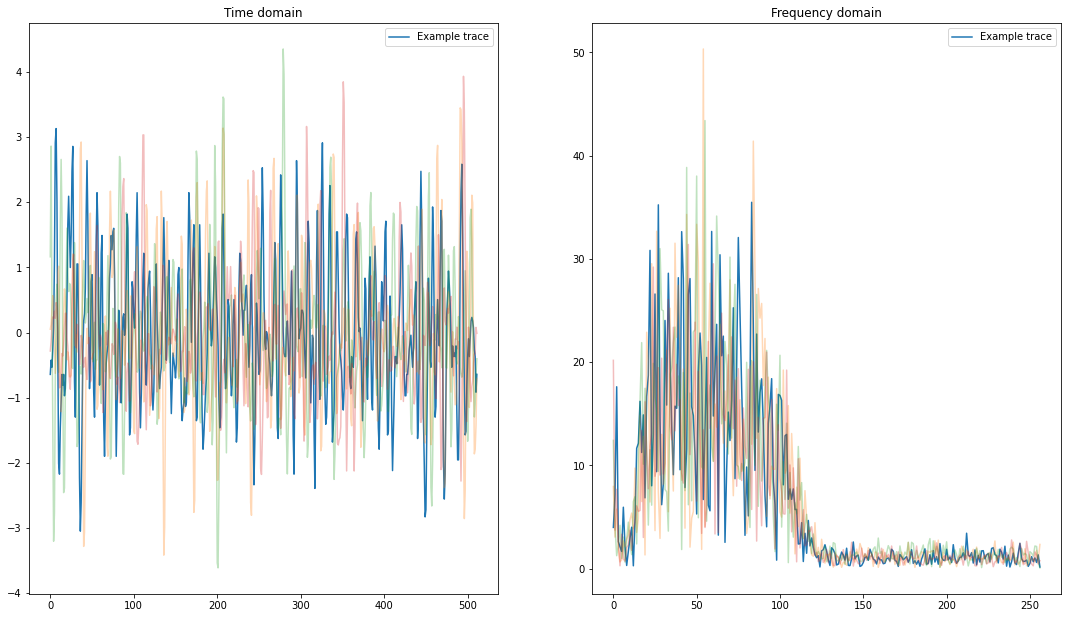

Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Critic loss: [-0.19963028, -0.6130776, 0.3271215, 0.08632581]
Generator loss: 0.619956


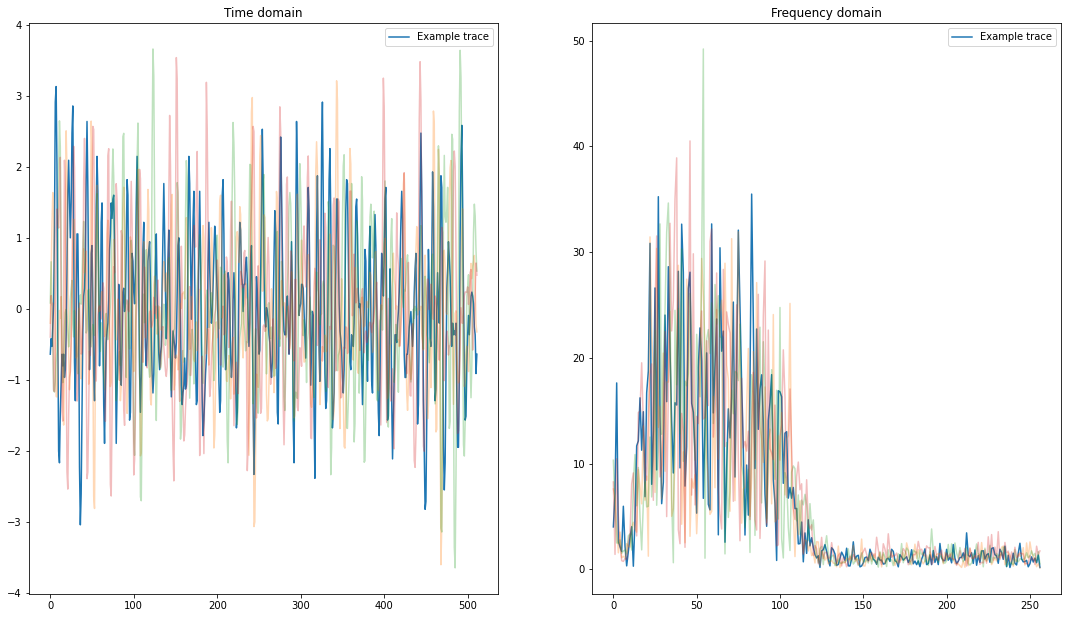

Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Critic loss: [-0.22189498, -0.63313264, 0.3200697, 0.091167964]
Generator loss: 0.6239177


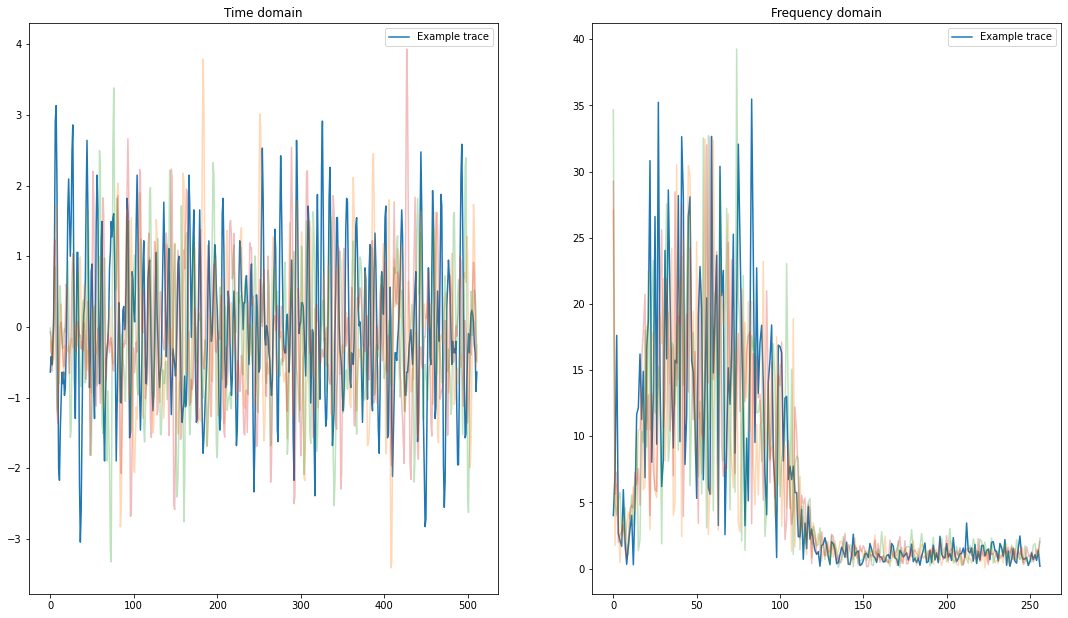

Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Critic loss: [-0.20275229, -0.63953125, 0.37074262, 0.06603634]
Generator loss: 0.69800365


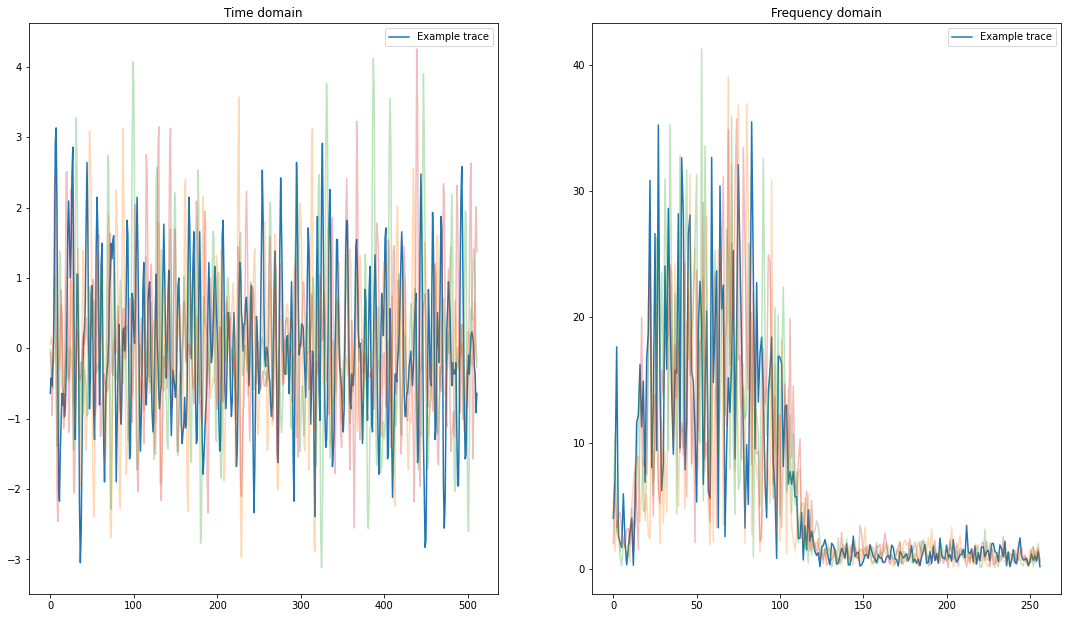

Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49


In [5]:
# Train the WGAN
generator_loss, critic_loss = wgan.train(data, epochs=50)

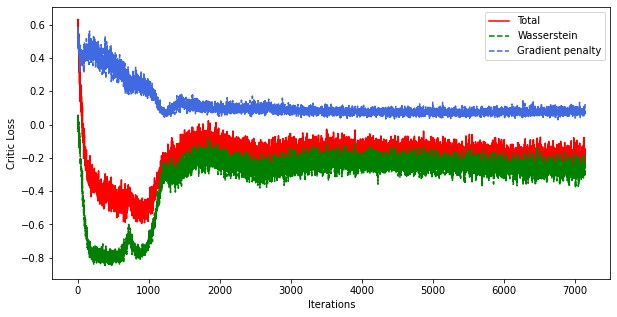

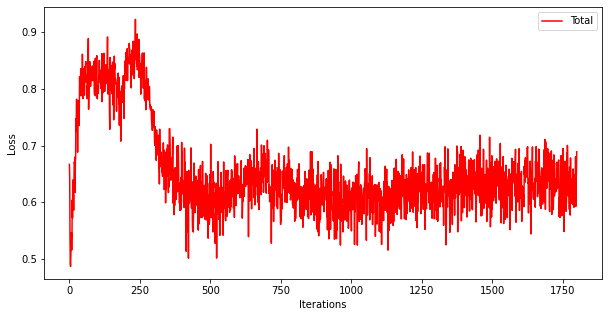

In [10]:
# Create arrays for generator and critic loss
wgan.plot_loss(generator_loss, critic_loss)

Mean data: -1.4336996031661545e-17
Mean generated: -0.05085532367229462
Mean current noise: 7.4372210184322e-06

Std data: 1.0000000000000002
Std generated: 0.9885944128036499
Std current noise: 0.4969108218928348


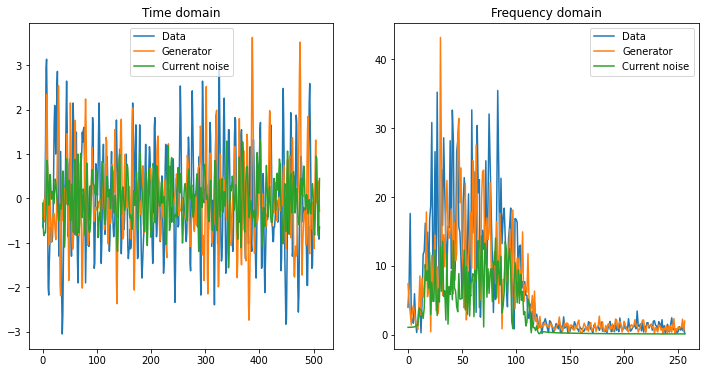

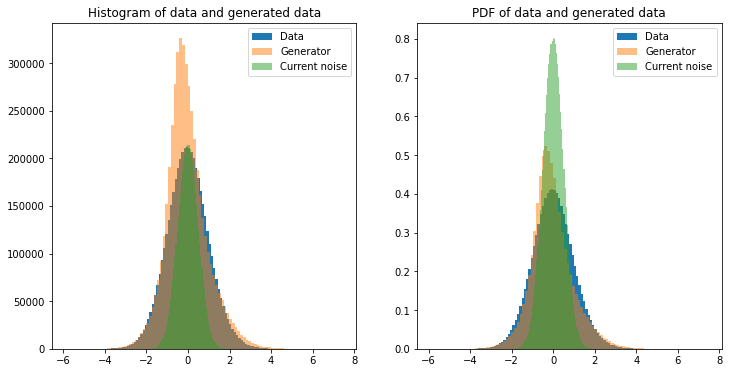

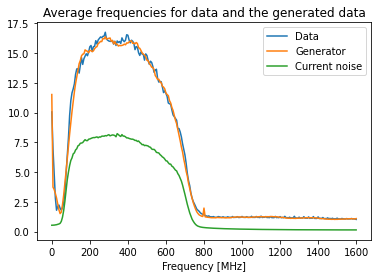

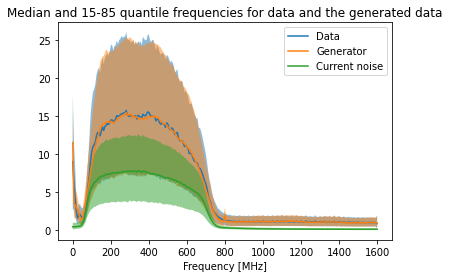

In [11]:
# Analyze the results
wgan.analyze_generator(data, current_noise)

In [8]:
# # Save the models
# g.save('generator')
# critic.save('critic')

In [9]:
# wgan.generator.save("stft_generator_3")